## UTS ##

## Machine Learning ##

**Amalia Salsa Lutfiana**

**3F/04/2141720228**

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan.
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

**Open Challange** (Opsional)
 - Bagaimana cara melakukan evaluasi pada hasil segementasi?
 - Terapkan pada kasus ini!


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans

**Plat 1**

In [114]:
img = cv2.imread('/content/drive/MyDrive/ML/UTS/85-E-2686-QH-04-19_jpeg.rf.40746df8e87648663e1deff8e0a363fe.jpg')

In [115]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

167
377
3


In [116]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(62959, 3)

In [117]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

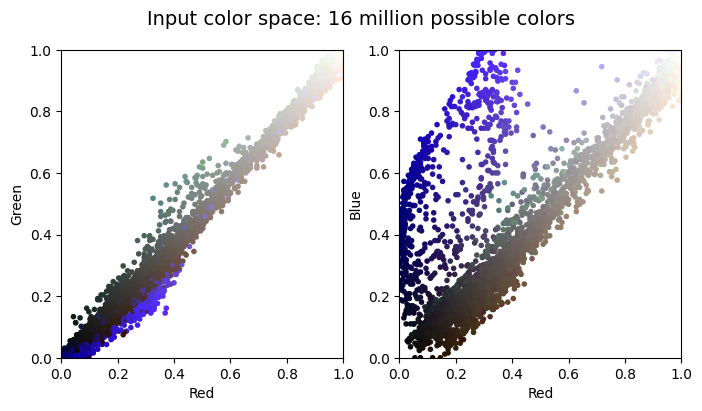

In [118]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [119]:
# Mengubah citra menjadi array 2D
citra_reshape = img.reshape((-1, 3))

# Mendifinisikan jumlah kluster
jumlah_klaster = 2

# Membuat objek kmeans
kmeans = KMeans(n_clusters=jumlah_klaster)

# Melakukan penyesuaian model dengan data citra
kmeans.fit(citra_reshape)

# Melakukan penyesuaian dengan bentuk citra asli
label_klaster = kmeans.labels_.reshape(img.shape[:2])

# Mengganti warna pixel dalam kluster 0 menjadi warna hitam
citra_segmentasi = img.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 0]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '2-color Image')

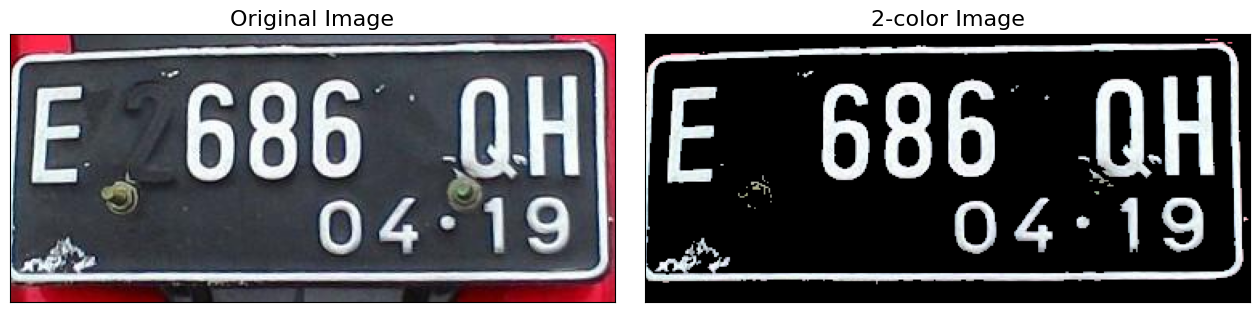

In [120]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

**Plat 2**

In [121]:
img = cv2.imread('/content/drive/MyDrive/ML/UTS/B3559SU_png.rf.da969620aaf4665b616f8f677a9a6201.jpg')

In [122]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

281
908
3


In [123]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(255148, 3)

In [124]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

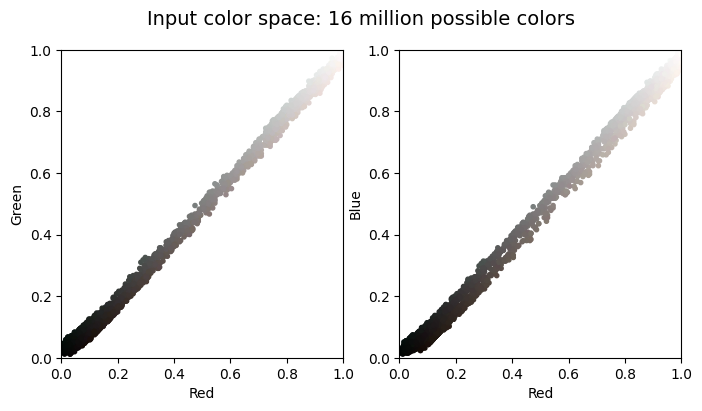

In [125]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [126]:
# Mengubah citra menjadi array 2D
citra_reshape = img.reshape((-1, 3))

# Mendefinisikan jumlah cluster
jumlah_klaster = 2

# Membuat objek K-means
kmeans = KMeans(n_clusters=jumlah_klaster)

# Melakukan penyesuaian model dengan data citra
kmeans.fit(citra_reshape)

# Melakukan penyesuaian dengan bentuk citra asli
label_klaster = kmeans.labels_.reshape(img.shape[:2])

# Mengganti warna pixel dalam kluster 0 menjadi warna hitam
citra_segmentasi = img.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 0]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '2-color Image')

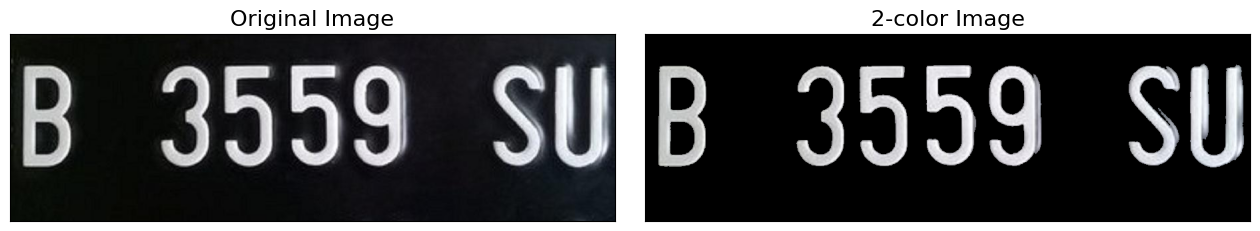

In [127]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

**Plat 3**

In [136]:
img = cv2.imread('/content/drive/MyDrive/ML/UTS/BA5751Y_png.rf.f8c4c1738e1d2b5ed1c63f713adebedd.jpg')

In [138]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

343
1183
3


In [139]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(405769, 3)

In [140]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

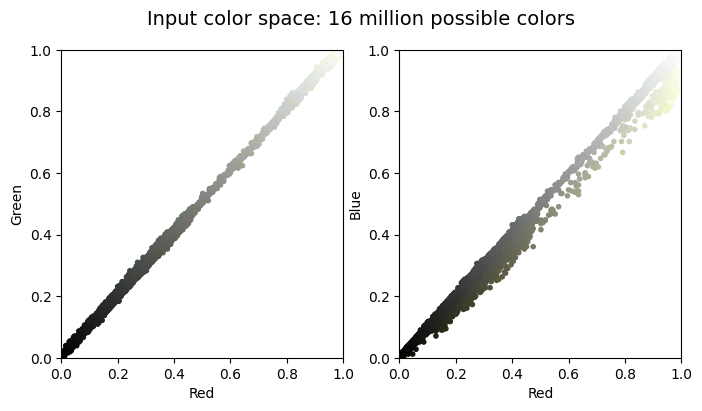

In [141]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [142]:
# Mengubah citra menjadi array 2D
citra_reshape = img.reshape((-1, 3))

# Mendefinisikan jumlah cluster
jumlah_klaster = 2

# Membuat objek K-means
kmeans = KMeans(n_clusters=jumlah_klaster)

# Melakukan penyesuaian model dengan data citra
kmeans.fit(citra_reshape)

# Melakukan penyesuaian dengan bentuk citra asli
label_klaster = kmeans.labels_.reshape(img.shape[:2])

# Mengganti warna pixel dalam kluster 0 menjadi warna hitam
citra_segmentasi = img.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '2-color Image')

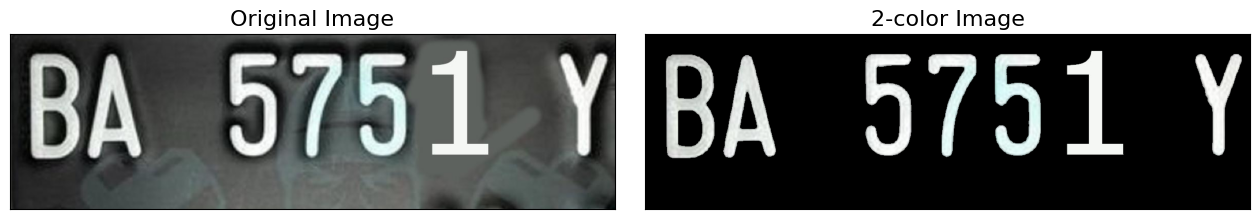

In [143]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

**Plat 4**

In [144]:
img = cv2.imread('/content/drive/MyDrive/ML/UTS/BM3456A_PNG.rf.761aab65b82b8453fa74118ca97d3ee2.jpg')

In [145]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

258
1101
3


In [146]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(284058, 3)

In [147]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

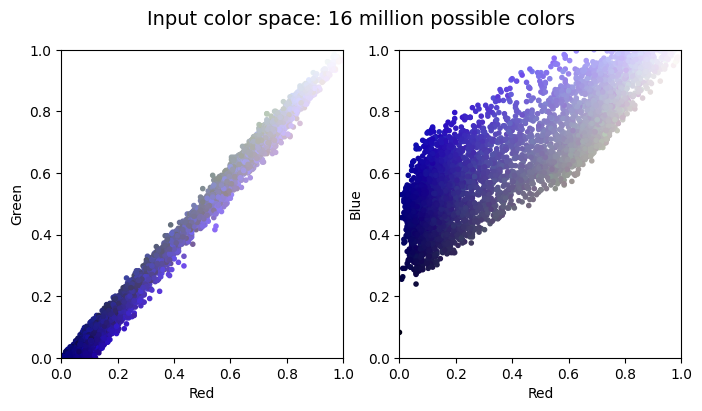

In [148]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [149]:
# Mengubah citra menjadi array 2D
citra_reshape = img.reshape((-1, 3))

# Menentukan jumlah klaster yang diinginkan
jumlah_klaster = 2

# Membuat objek Kmeans
kmeans = KMeans(n_clusters=jumlah_klaster)

# Menyesuaikan model dengan citra asli
kmeans.fit(citra_reshape)

# Melakukan Penyesuaian dengan bentuk asli citra
label_klaster = kmeans.labels_.reshape(img.shape[:2])

# Mengganti warna pixel dalam kluster 0 menjadi warna merah
citra_segmentasi = img.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 255]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '2-color Image')

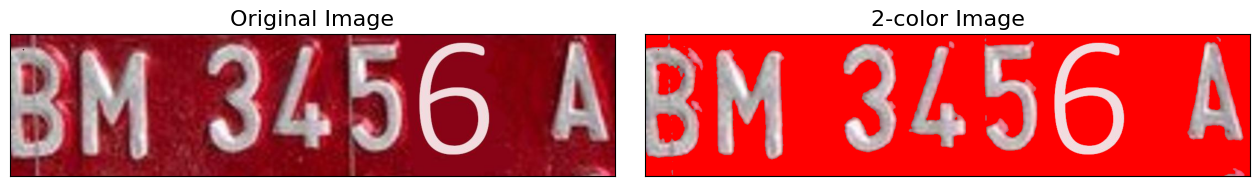

In [150]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

**Plat 5**

In [151]:
img = cv2.imread('/content/drive/MyDrive/ML/UTS/BE2775U_png.rf.1154baadf3d47887a53660553b91c183.jpg')

In [152]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

213
716
3


In [153]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(152508, 3)

In [154]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

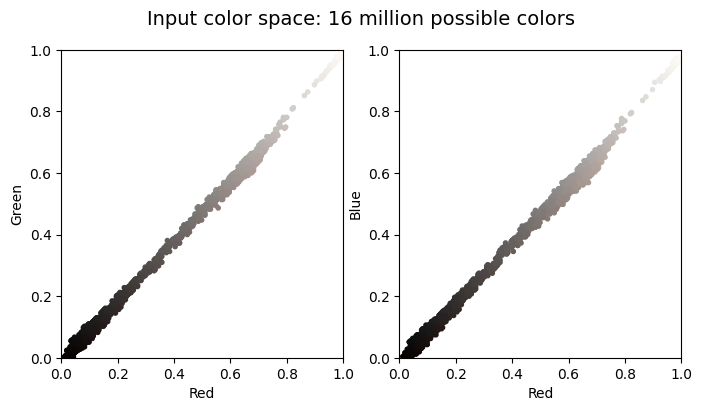

In [155]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [156]:
# Mengubah citra menjadi array 2D
citra_reshape = img.reshape((-1, 3))

# Mendefinisikan jumlah cluster
jumlah_klaster = 2

# Membuat objek K-means
kmeans = KMeans(n_clusters=jumlah_klaster)

# Menyesuaikan model dengan data citra
kmeans.fit(citra_reshape)

# Melakukan Penyesuaian dengan bentuk asli citra
label_klaster = kmeans.labels_.reshape(img.shape[:2])

# Mengganti warna pixel dalam kluster 0 menjadi warna hitam
citra_segmentasi = img.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 0]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '2-color Image')

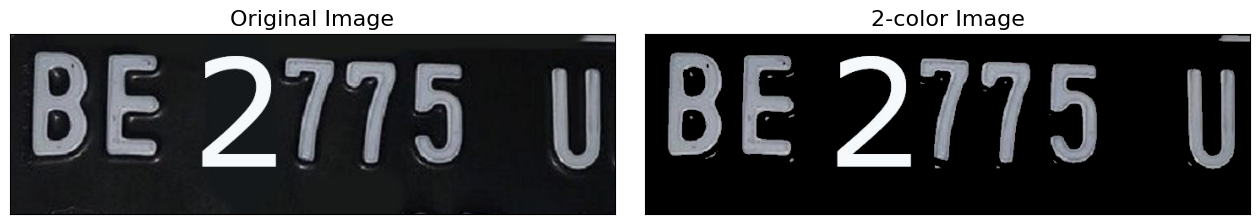

In [157]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)